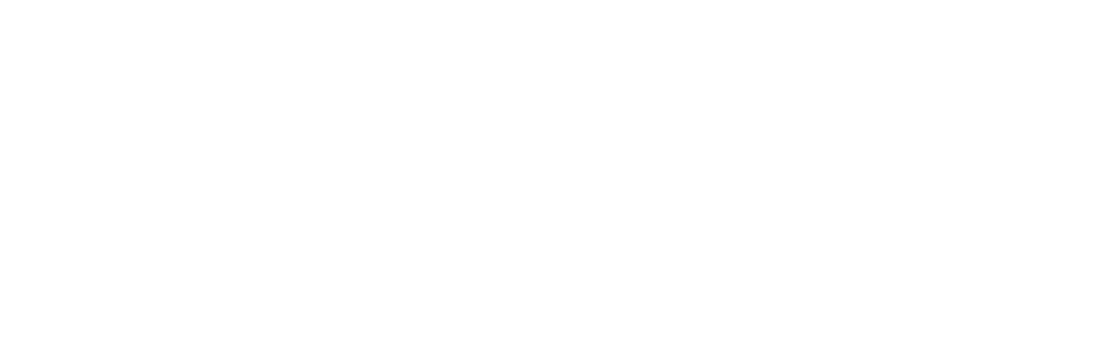

In [6]:
import json
import plotly.graph_objects as go

# Função para carregar o arquivo JSON
def load_json(filepath):
    with open(filepath, 'r') as file:
        return json.load(file)

# Função para converter a árvore JSON em listas de labels e parents
def parse_tree(node, labels=None, parents=None, parent=None):
    if labels is None:
        labels = []
    if parents is None:
        parents = []
    
    labels.append(node['title'])
    parents.append(parent)
    
    if 'children' in node:
        for child in node['children']:
            parse_tree(child, labels, parents, node['title'])
    
    return labels, parents

# Carregar os dados JSON
tree_data = load_json('brasilien_tree.json')

# Converter a árvore JSON em listas de labels e parents
labels, parents = parse_tree(tree_data)

# Criar o gráfico de árvore com Plotly
fig = go.Figure(go.Treemap(
    labels=labels,
    parents=parents
))

# Mostrar o gráfico
fig.show()


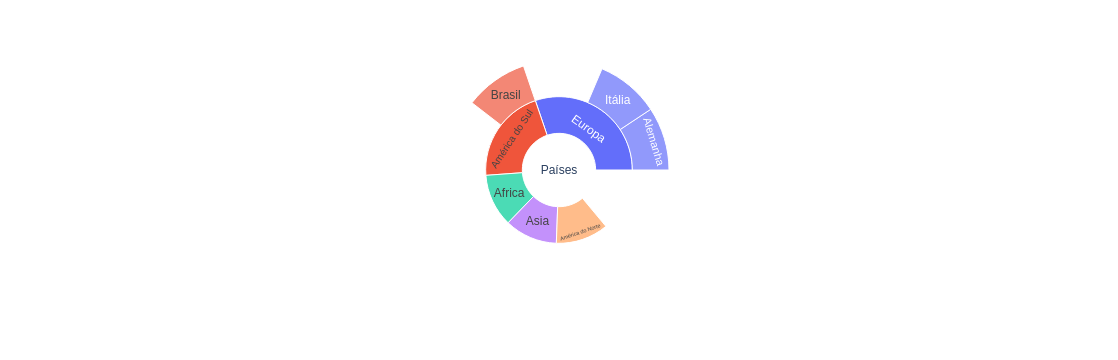

In [5]:
import plotly.express as px
data = dict(
    character=["Países", "Africa", "Europa", "Alemanha", "Itália", "Asia", "América do Sul", "Brasil", "América do Norte"],
    parent=["", "Países", "Países", "Europa", "Europa", "Países", "Países", "América do Sul", "Países" ],
    value=[12, 10, 10, 8, 8, 10, 10, 8, 10])

fig = px.sunburst(
    data,
    names='character',
    parents='parent',
    values='value',
)
fig.show()